<a href="https://colab.research.google.com/github/khotimnr/Deep-Learning/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras Tutorial Overview**

**1.   Regression Loss Functions**
*   Mean Squared Error Loss
*   Mean Squared Logarithmic Error Loss
*   Mean Absolute Error Loss

**2.   Binary Classification Loss Functions**
*   Binary Cross-Entropy
*   Hinge Loss
*   Squared Hinge Loss

**3.   Multi-Class Classification Loss Functions**
*   Multi-Class Cross-Entropy Loss
*   Sparse Multiclass Cross-Entropy Loss
*   Kullback Leibler Divergence Loss


In [ ]:

# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
...

Ellipsis

In [ ]:
# lakukan load dataset terlebih dahulu
import pandas as pd

dataset = pd.read_csv("Subs to be reload (1).csv")
dataset.head()

,msisdn,current_tier,available_points,vlr_attached_p3d,flag_arpu_90d,flag_arpu_last_30d,tenure_rgu,rgu_flag,rld_30d,rld_60d,...,denom_60d,denom_90d,curr_balance,active_pack,status,n_days,arpu_rld,cust_flag,rld_nm,rld_tot
0,62816557972,Platinum,6210.0,1,4. hvc,1. nvc,619,RGU 30D,0,0,...,0,12000,250.0,0,ACTIVE,54.0,12000.0000,Moderate,0,0
1,62816276744,Gold,11250.0,1,4. hvc,4. hvc,178,RGU 30D,1,1,...,100000,100000,0.0,1,ACTIVE,346.0,133333.3333,Healthy,1,200000
2,628562896570,Gold,3475.0,1,4. hvc,4. hvc,1307,RGU 30D,1,1,...,60000,50000,300.0,1,ACTIVE,171.0,156666.6667,Healthy,1,150000
3,628558031093,Platinum,9200.0,1,4. hvc,3. mvc,1307,RGU 30D,1,1,...,50000,100000,0.0,1,ACTIVE,346.0,108333.3333,Healthy,1,110000
4,628561791529,Platinum,4925.0,1,4. hvc,4. hvc,982,RGU 30D,0,0,...,0,100000,175.0,1,ACTIVE,299.0,112000.0000,Moderate,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   msisdn              1000000 non-null  int64  
 1   current_tier        1000000 non-null  object 
 2    available_points   1000000 non-null  float64
 3   vlr_attached_p3d    1000000 non-null  int64  
 4   flag_arpu_90d       1000000 non-null  object 
 5   flag_arpu_last_30d  1000000 non-null  object 
 6   tenure_rgu          1000000 non-null  int64  
 7   rgu_flag            1000000 non-null  object 
 8   rld_30d             1000000 non-null  int64  
 9   rld_60d             1000000 non-null  int64  
 10  rld_90d             1000000 non-null  int64  
 11  rld_tot_30d         1000000 non-null  int64  
 12  rld_tot_60d         1000000 non-null  int64  
 13  rld_tot_90d         1000000 non-null  int64  
 14  reload_p90d         1000000 non-null  int64  
 15  tot_month_rld   

In [ ]:
dataset.rld_nm=dataset.rld_nm.astype('category').cat.codes
dataset.current_tier=dataset.current_tier.astype('category').cat.codes
dataset.flag_arpu_90d=dataset.flag_arpu_90d.astype('category').cat.codes
dataset.flag_arpu_last_30d=dataset.flag_arpu_last_30d.astype('category').cat.codes
dataset.rgu_flag=dataset.rgu_flag.astype('category').cat.codes
dataset.status=dataset.status.astype('category').cat.codes
dataset.cust_flag =dataset.cust_flag .astype('category').cat.codes

In [ ]:
import numpy as np

In [ ]:
dataset['curr_balance'] = dataset['curr_balance'].fillna(0).astype(np.int64)
dataset['n_days'] = dataset['n_days'].fillna(0).astype(np.int64)
dataset['arpu_rld'] = dataset['arpu_rld'].fillna(0).astype(np.int64)


In [ ]:
# descriptions
dataset.describe()

,msisdn,current_tier,available_points,vlr_attached_p3d,flag_arpu_90d,flag_arpu_last_30d,tenure_rgu,rgu_flag,rld_30d,rld_60d,...,denom_60d,denom_90d,curr_balance,active_pack,status,n_days,arpu_rld,cust_flag,rld_nm,rld_tot
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.0,1000000.00000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,...,1000000.000000,1000000.00000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06
mean,6.156493e+12,1.500443,3.530377e+03,1.0,2.06006,1.931728,740.842482,0.0,0.789965,0.762648,...,29637.831000,28787.90800,4.188156e+03,0.777470,0.003110,198.597080,6.593298e+04,0.559621,0.351260,2.567477e+04
std,8.481429e+11,1.186427,5.471638e+03,0.0,0.68777,0.867723,433.651567,0.0,0.407333,0.425460,...,34056.115169,33924.73139,3.178554e+04,0.415945,0.080152,130.445473,1.153921e+05,0.496433,0.477364,6.209974e+04
min,6.281620e+10,0.000000,0.000000e+00,1.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000e+00,0.000000,-1.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000e+00
25%,6.285694e+12,0.000000,9.500000e+02,1.0,2.00000,1.000000,347.000000,0.0,1.000000,1.000000,...,5000.000000,0.00000,0.000000e+00,1.000000,0.000000,73.000000,2.500000e+04,0.000000,0.000000,0.000000e+00
50%,6.285753e+12,1.000000,1.996000e+03,1.0,2.00000,2.000000,702.000000,0.0,1.000000,1.000000,...,20000.000000,20000.00000,1.210000e+02,1.000000,0.000000,188.000000,5.000000e+04,1.000000,0.000000,0.000000e+00
75%,6.285812e+12,3.000000,4.375000e+03,1.0,3.00000,3.000000,1220.000000,0.0,1.000000,1.000000,...,50000.000000,50000.00000,1.528000e+03,1.000000,0.000000,342.000000,9.166600e+04,1.000000,1.000000,3.000000e+04
max,6.285900e+12,3.000000,2.249175e+06,1.0,3.00000,3.000000,1329.000000,0.0,1.000000,1.000000,...,1000000.000000,1000000.00000,8.067697e+06,1.000000,2.000000,1822.000000,8.600000e+07,1.000000,1.000000,1.450000e+07


In [ ]:
dataset.isnull().sum()

msisdn                0
current_tier          0
 available_points     0
vlr_attached_p3d      0
flag_arpu_90d         0
flag_arpu_last_30d    0
tenure_rgu            0
rgu_flag              0
rld_30d               0
rld_60d               0
rld_90d               0
rld_tot_30d           0
rld_tot_60d           0
rld_tot_90d           0
reload_p90d           0
tot_month_rld         0
denom_30d             0
denom_60d             0
denom_90d             0
curr_balance          0
active_pack           0
status                0
n_days                0
arpu_rld              0
cust_flag             0
rld_nm                0
rld_tot               0
dtype: int64

In [ ]:
# class distribution
print(dataset.groupby('rld_nm').size())

rld_nm
0    648740
1    351260
dtype: int64


In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:25]
y = array[:,25]
y

array([0., 1., 1., ..., 1., 0., 1.])

In [ ]:
print(X.shape)
print(X[0].shape)

(1000000, 24)
(24,)


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_shape=(24,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Binary Cross-Entropy Loss**

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, 
          validation_split=0.2,
          batch_size=64,
          epochs=3)

Epoch 1/3
12500/12500 [==============================] - 40s 3ms/step - loss: 33.0463 - accuracy: 0.5905 - val_loss: 0.6440 - val_accuracy: 0.6556
Epoch 2/3
12500/12500 [==============================] - 33s 3ms/step - loss: 0.6493 - accuracy: 0.6470 - val_loss: 0.6440 - val_accuracy: 0.6556
Epoch 3/3
12500/12500 [==============================] - 32s 3ms/step - loss: 0.6493 - accuracy: 0.6470 - val_loss: 0.6439 - val_accuracy: 0.6556


In [ ]:
...
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

31250/31250 [==============================] - 66s 2ms/step - loss: 0.6482 - accuracy: 0.6487
Accuracy: 64.87


In [ ]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(X[0]) for X in predictions]

In [ ]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

In [ ]:
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[1.0, 6210.0, 1.0, 3.0, 0.0, 619.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 12000.0, 12000.0, 1.0, 0.0, 0.0, 12000.0, 250.0, 0.0, 0.0, 54.0, 12000.0, 1.0] => 0 (expected 0)
[0.0, 11250.0, 1.0, 3.0, 3.0, 178.0, 0.0, 1.0, 1.0, 1.0, 200000.0, 100000.0, 100000.0, 400000.0, 3.0, 100000.0, 100000.0, 100000.0, 0.0, 1.0, 0.0, 346.0, 133333.0, 0.0] => 0 (expected 1)
[0.0, 3475.0, 1.0, 3.0, 3.0, 1307.0, 0.0, 1.0, 1.0, 1.0, 170000.0, 195000.0, 105000.0, 470000.0, 3.0, 50000.0, 60000.0, 50000.0, 300.0, 1.0, 0.0, 171.0, 156666.0, 0.0] => 0 (expected 1)
[1.0, 9200.0, 1.0, 3.0, 2.0, 1307.0, 0.0, 1.0, 1.0, 1.0, 100000.0, 100000.0, 125000.0, 325000.0, 3.0, 100000.0, 50000.0, 100000.0, 0.0, 1.0, 0.0, 346.0, 108333.0, 0.0] => 0 (expected 1)
[1.0, 4925.0, 1.0, 3.0, 3.0, 982.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 112000.0, 112000.0, 1.0, 0.0, 0.0, 100000.0, 175.0, 1.0, 0.0, 299.0, 112000.0, 1.0] => 0 (expected 0)


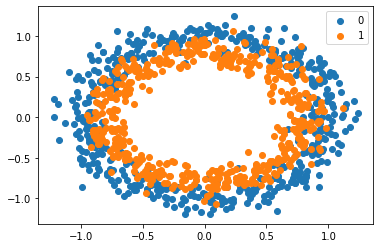

In [ ]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

**Normalisasi**




In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_transform = scaler.fit_transform(X)

In [ ]:
model.fit(X_transform, y, epochs=3)

Epoch 1/3
31250/31250 [==============================] - 65s 2ms/step - loss: 0.6240 - accuracy: 0.6508
Epoch 2/3
31250/31250 [==============================] - 64s 2ms/step - loss: 0.6211 - accuracy: 0.6531
Epoch 3/3
31250/31250 [==============================] - 63s 2ms/step - loss: 0.6201 - accuracy: 0.6536


In [ ]:
...
# evaluate the keras model
_, accuracy = model.evaluate(X_transform, y)
print('Accuracy: %.2f' % (accuracy*100))

31250/31250 [==============================] - 55s 2ms/step - loss: 0.6199 - accuracy: 0.6543
Accuracy: 65.43


**Hinge Loss**

In [ ]:
# compile the keras model
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, 
          validation_split=0.2,
          batch_size=64,
          epochs=3)

Epoch 1/3
12500/12500 [==============================] - 32s 3ms/step - loss: 1.0022 - accuracy: 0.6470 - val_loss: 1.0000 - val_accuracy: 0.6556
Epoch 2/3
12500/12500 [==============================] - 31s 2ms/step - loss: 1.0000 - accuracy: 0.6470 - val_loss: 1.0000 - val_accuracy: 0.6556
Epoch 3/3
12500/12500 [==============================] - 32s 3ms/step - loss: 1.0000 - accuracy: 0.6470 - val_loss: 1.0000 - val_accuracy: 0.6556


In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

31250/31250 [==============================] - 71s 2ms/step - loss: 1.0000 - accuracy: 0.6487
Accuracy: 64.87


**SHAP**

In [ ]:
X_shap = dataset.sample(frac=0.001, random_state=123)
# class distribution
print(X_shap.groupby('rld_nm').size())

rld_nm
0    649
1    351
dtype: int64


In [ ]:
X_shap = X_shap.drop(['rld_nm'], axis=1)

In [ ]:
# Split-out validation dataset
array = X_shap.values
X_shap = array[:,1:25]

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Package
import eli5
import shap
shap.initjs()

In [ ]:
explainer = shap.DeepExplainer(model, X)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [ ]:
shap_values = explainer.shap_values(X_shap)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


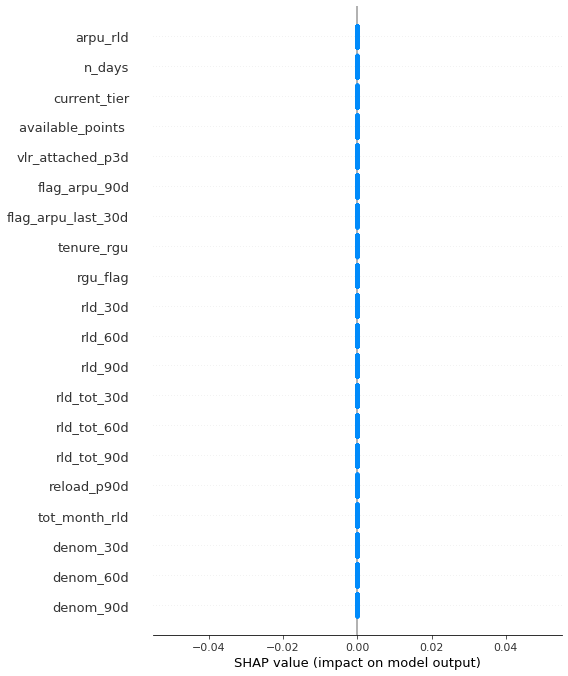

In [ ]:
X_data = dataset.drop(['rld_nm'], axis=1)
X_data.shape
shap.summary_plot(shap_values[0], feature_names = X_data.columns)

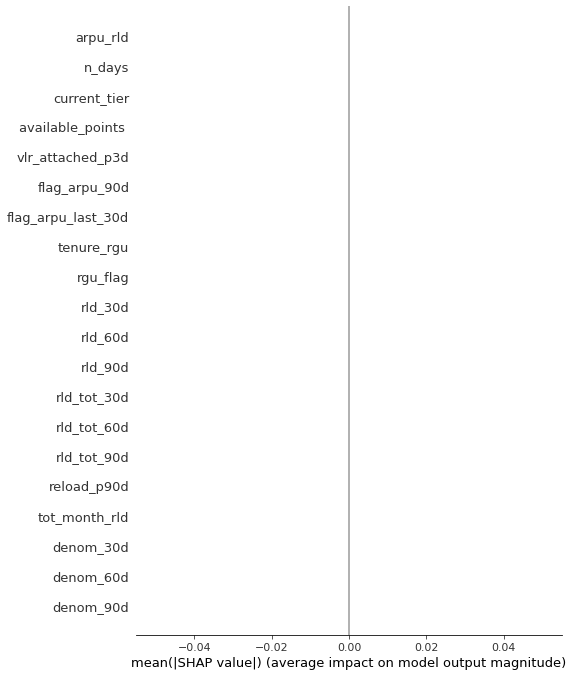

In [ ]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_data.columns)